In [1]:
import pandas as pd
import os

In [2]:
path = os.getcwd()
path 

'/Users/daniellechen/Box Sync/2017Winter/STA141B/CaliforniaHousing'

In [3]:
school = pd.read_excel("school.xlsx",skiprows = [1,2,3], header = 1)
school.head()

,Rank (2015-16),District,District URL,City,City URL,Zip,County,Low Grade,High Grade,Number Students,Number of Ranked Elementary Schools,Number of Ranked Middle Schools,Number of Ranked High Schools,Rank Score (2016),Rank Score (2015),Rank (2015),Rank Change from 2015,SchoolDigger Star Rating (2016)
0,1.0,Saratoga Union Elementary,https://www.schooldigger.com/go/CA/district/35...,Saratoga,https://www.schooldigger.com/go/CA/city/Sarato...,95070,Santa Clara,KG,08,2069.0,3.0,1.0,0.0,0.9915045,0.9900003,4,3,5.0
1,2.0,Montecito Union Elementary,https://www.schooldigger.com/go/CA/district/25...,Santa Barbara,https://www.schooldigger.com/go/CA/city/Santa+...,93108,Santa Barbara,KG,06,448.0,1.0,0.0,0.0,0.9914605,0.9850907,10,8,5.0
2,3.0,Orinda Union Elementary,https://www.schooldigger.com/go/CA/district/28...,Orinda,https://www.schooldigger.com/go/CA/city/Orinda...,94563,Contra Costa,KG,08,2529.0,4.0,1.0,0.0,0.9889783,0.9927674,2,-1,5.0
3,4.0,La Canada Unified,https://www.schooldigger.com/go/CA/district/20...,La Canada,https://www.schooldigger.com/go/CA/city/La+Can...,91011,Los Angeles,KG,12,4044.0,3.0,1.0,1.0,0.9885594,0.9826217,13,9,5.0
4,5.0,Hillsborough City Elementary,https://www.schooldigger.com/go/CA/district/17...,Hillsborough,https://www.schooldigger.com/go/CA/city/Hillsb...,94010,San Mateo,KG,08,1536.0,3.0,1.0,0.0,0.9883784,0.9891496,5,0,5.0


In [4]:
school_rank = school.iloc[:,[0,1,3,5,6,13,14,15,17]]
school_rank.columns = ['Rank2016','District','City','Zip','County','Score2016','Score2015','Rank2015','SchoolDiggerRating']
school_rank.head()

,Rank2016,District,City,Zip,County,Score2016,Score2015,Rank2015,SchoolDiggerRating
0,1.0,Saratoga Union Elementary,Saratoga,95070,Santa Clara,0.9915045,0.9900003,4,5.0
1,2.0,Montecito Union Elementary,Santa Barbara,93108,Santa Barbara,0.9914605,0.9850907,10,5.0
2,3.0,Orinda Union Elementary,Orinda,94563,Contra Costa,0.9889783,0.9927674,2,5.0
3,4.0,La Canada Unified,La Canada,91011,Los Angeles,0.9885594,0.9826217,13,5.0
4,5.0,Hillsborough City Elementary,Hillsborough,94010,San Mateo,0.9883784,0.9891496,5,5.0


In [5]:
def string_to_float(value):
    """
    This function read string and return float number
    
    Input: String
    Return: Float
    """
    try:
        return float(value)
    except:
        return None

def string_to_int(value):
    """
    This function read string and return integer
    
    Input: String
    Return: int
    """
    try:
        return int(value)
    except:
        return None

for i in range(school_rank.shape[0]):
    school_rank.ix[i,"Score2016"] = string_to_float(school_rank.ix[i,"Score2016"])
    school_rank.ix[i,"Score2015"] = string_to_float(school_rank.ix[i,"Score2015"])
    school_rank.ix[i,"Rank2015"] = string_to_int(school_rank.ix[i,"Rank2015"])
    school_rank.ix[i,"Rank2016"] = string_to_int(school_rank.ix[i,"Rank2016"])

//anaconda/envs/141b/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
school_rank[['Score2016', 'Score2015','Rank2015']] = school_rank[['Score2016', 'Score2015','Rank2015']].astype('float64')
school_rank.dtypes

//anaconda/envs/141b/lib/python2.7/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Rank2016              float64
District               object
City                   object
Zip                     int64
County                 object
Score2016             float64
Score2015             float64
Rank2015              float64
SchoolDiggerRating    float64
dtype: object

In [7]:
school_rank.to_csv('school_rank.csv')

In [8]:
county_rank = school_rank[['Score2016', 'Score2015']].groupby(school_rank['County']).mean()
county_rank.head()

,Score2016,Score2015
County,,
Alameda,0.644101,0.645995
Alpine,NaN,NaN
Amador,0.474435,0.511912
Butte,0.406066,0.416367
Calaveras,0.576143,0.615234


In [9]:
county_2016 = school_rank[['Rank2016','City','Zip']].groupby(school_rank['County']).min()
county_2016.columns = ["Rank2016","Highest Rank City 2016",'Zip2016']
county_2015 = school_rank[['Rank2015','City','Zip']].groupby(school_rank['County']).min()
county_2015.columns = ["Rank2015","Highest Rank City 2015",'Zip2015']
county_rank = county_rank.merge(county_2016,left_index = True, right_index = True)
county_rank = county_rank.merge(county_2015,left_index = True, right_index = True)

In [86]:
county_rank.to_csv('county_rank.csv')
county_rank.head()

NameError: name 'county_rank' is not defined

In [11]:
county_shools = school[["Number Students","Number of Ranked Elementary Schools","Number of Ranked Middle Schools","Number of Ranked High Schools"]].groupby(school['County']).sum()
county_rank = county_rank.merge(county_shools,left_index = True, right_index = True)

In [12]:
county_rank.to_csv('county_all_rank.csv')
county_rank

,Score2016,Score2015,Rank2016,Highest Rank City 2016,Zip2016,Rank2015,Highest Rank City 2015,Zip2015,Number Students,Number of Ranked Elementary Schools,Number of Ranked Middle Schools,Number of Ranked High Schools
County,,,,,,,,,,,,
Alameda,0.644101,0.645995,25.0,Alameda,94501,44.0,Alameda,94501,224453.0,219.0,87.0,83.0
Alpine,NaN,NaN,NaN,Markleeville,96120,NaN,Markleeville,96120,89.0,NaN,NaN,NaN
Amador,0.474435,0.511912,505.0,Diamond Springs,95619,453.0,Diamond Springs,95619,4020.0,6.0,2.0,3.0
Butte,0.406066,0.416367,137.0,Bangor,95914,159.0,Bangor,95914,30982.0,38.0,22.0,17.0
Calaveras,0.576143,0.615234,143.0,Angels Camp,95221,107.0,Angels Camp,95221,5753.0,9.0,3.0,1.0
Colusa,0.433651,0.508406,497.0,Arbuckle,95912,328.0,Arbuckle,95912,4763.0,5.0,3.0,3.0
Contra Costa,0.635856,0.651134,3.0,Antioch,94509,2.0,Antioch,94509,174213.0,148.0,54.0,55.0
Del Norte,0.318208,0.332751,685.0,Crescent City,95531,662.0,Crescent City,95531,4121.0,7.0,3.0,2.0
El Dorado,0.641135,0.674248,37.0,Camino,95634,34.0,Camino,95634,26913.0,30.0,19.0,12.0


In [13]:
import urllib
import ast
import HTMLParser
import string
import json
#http://nbviewer.jupyter.org/gist/BibMartin/4b9784461d2fa0d89353

In [14]:
#url = 'http://catalog.civicdashboards.com/dataset/ce409ee1-5128-4b66-aa3e-957dbd4de8ba/resource/6f805645-0836-478d-b168-c1f72d53b4f3/download/5faf934922fd4748a843d55990297d9ftemp.geojson'
california_data = json.load(open('california.json'))
california_data

{u'features': [{u'geometry': {u'coordinates': [[[[-124.194502, 40.961703],
       [-124.182694, 41.001312999999996],
       [-124.204984, 41.013638],
       [-124.227079, 41.046622],
       [-124.231202, 41.065501],
       [-124.249588, 41.099025],
       [-124.24916400000001, 41.120157],
       [-124.252474, 41.134074999999996],
       [-124.247236, 41.152817],
       [-124.237625, 41.165959],
       [-124.21941799999999, 41.177687],
       [-124.195532, 41.184582],
       [-124.176367, 41.237148],
       [-124.173316, 41.260995],
       [-124.160704, 41.289293],
       [-124.163398, 41.293169],
       [-124.192328, 41.29199],
       [-124.220032, 41.302994],
       [-124.23821, 41.321446],
       [-124.24242, 41.3433],
       [-124.238191, 41.358705],
       [-124.231087, 41.368856],
       [-124.206515, 41.384718],
       [-124.176556, 41.390352],
       [-124.154195, 41.387628],
       [-124.139973, 41.381820999999995],
       [-124.133231, 41.432311],
       [-124.136906, 41.44682

In [15]:
import folium
import json
from branca.utilities import _locations_mirror
from folium.features import *
from folium.features import _locations_tolist

In [16]:
class MultiPolygon(MacroElement):
    """
    !! This is hacked from folium.features.MultiPolyLine !! 
    
    """
    def __init__(self, locations, color=None, weight=None,
                 opacity=None, latlon=True, popup=None):
        super(MultiPolygon, self).__init__()
        self._name = 'MultiPolygon'
        self.data = (_locations_mirror(locations) if not latlon else
                     _locations_tolist(locations))
        self.color = color
        self.weight = weight
        self.opacity = opacity
        if isinstance(popup, text_type) or isinstance(popup, binary_type):
            self.add_children(Popup(popup))
        elif popup is not None:
            self.add_children(popup)

        self._template = Template(u"""
            {% macro script(this, kwargs) %}
                var {{this.get_name()}} = L.multiPolygon(
                    {{this.data}},
                    {
                        {% if this.color != None %}color: '{{ this.color }}',{% endif %}
                        {% if this.weight != None %}weight: {{ this.weight }},{% endif %}
                        {% if this.opacity != None %}opacity: {{ this.opacity }},{% endif %}
                        });
                {{this._parent.get_name()}}.addLayer({{this.get_name()}});
            {% endmacro %}
            """)  # noqa

    def _get_self_bounds(self):
        """Computes the bounds of the object itself (not including it's children)
        in the form [[lat_min, lon_min], [lat_max, lon_max]]
        """
        bounds = [[None, None], [None, None]]
        for point in iter_points(self.data):
            bounds = [
                [
                    none_min(bounds[0][0], point[0]),
                    none_min(bounds[0][1], point[1]),
                ],
                [
                    none_max(bounds[1][0], point[0]),
                    none_max(bounds[1][1], point[1]),
                ],
            ]
        return bounds

In [17]:
m = folium.Map([44,-127], zoom_start=5)

fg = folium.map.FeatureGroup().add_to(m)

for feature in california_data['features']:
    name = '',
    for i in county_rank.index.values:
        if i in feature['properties']['name']:
            name = feature['properties']['name'] + "          " + "Score 2016: " + str(county_rank.loc[i,:]["Score2016"])
    fg.add_child(MultiPolygon(
        _locations_mirror(feature['geometry']['coordinates']),
        color='green' if 'e' in feature['properties']['name'].lower() else '#ffff00',
        weight=0,
        #popup = feature['properties']['name'] 
        popup = name
        ))


In [18]:
m

# 0301

In [36]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import urllib
import ast
import HTMLParser
import string
import json
import os
import plotly.tools as tls
import pandas as pd
tls.set_credentials_file(username='danielle91515', api_key='21adnMDaPAYjgIplx7of')

In [37]:
init_notebook_mode(connected=True)
#http://andrewfulton.io/programming/2016/10/01/county-choropleth-colorbar.html

In [38]:
path = os.getcwd()
path 

'/Users/daniellechen/Box Sync/2017Winter/STA141B/CaliforniaHousing'

In [39]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Unnamed: 0,RegionName,sold_15,sold_16,list_15,list_16,one_15,one_16,two_15,two_16,...,Highest Rank City 2016,Zip2016,Rank2015,Highest Rank City 2015,Zip2015,Number Students,Number of Ranked Elementary Schools,Number of Ranked Middle Schools,Number of Ranked High Schools,total_income
0,0,Los Angeles,498737.500000,518508.333333,537666.666667,587328.666667,363468.333333,409424.500000,433116.583333,469545.750000,...,Acton,90017,9.0,Acton,90017,1534702.0,1275.0,502.0,469.0,3263069
1,1,Orange,601020.833333,623150.000000,675932.083333,705890.000000,279250.000000,303945.833333,417687.500000,441220.833333,...,Anaheim,90620,31.0,Anaheim,90620,496719.0,385.0,113.0,100.0,1009353
2,2,San Diego,472187.500000,489250.000000,538650.000000,575525.000000,276475.000000,319328.625000,360778.166667,396704.083333,...,Alpine,91901,10.0,Alpine,91901,502352.0,434.0,188.0,145.0,1094157
3,3,Riverside,309068.750000,320437.500000,344257.500000,361732.458333,145399.875000,145940.750000,227945.750000,237962.041667,...,Banning,92220,123.0,Banning,92220,425225.0,284.0,104.0,105.0,699232
4,4,San Bernardino,264327.083333,272666.666667,271312.500000,291733.333333,NaN,NaN,172779.083333,185468.166667,...,Adelanto,91701,115.0,Adelanto,91701,409680.0,336.0,125.0,100.0,614325


## Add geographic coordinates 

In [40]:
california_data = json.load(open('california.json'))

geo_dict = {}
for x in range(len(california_data['features'])):
    # I ignore the last eleven characters in the name since the geojson file includes ' County, CO' in the county names and the population data does not
    name = california_data['features'][x]['properties']['name'][:-11]
    if name in all_data['RegionName'].unique():
        geo_dict[name] = california_data['features'][x]
    else:
        print 'not in: ', name

ser = pd.Series(geo_dict.values(), index = geo_dict.keys())
ser.name = 'coordinates'
all_data_cord = all_data.join(ser, on='RegionName')
all_data_sub = all_data_cord[['RegionName','sold_15','sold_16','list_15','list_16','Score2016','Score2015',"coordinates"]]
all_data_sub.head()

,RegionName,sold_15,sold_16,list_15,list_16,Score2016,Score2015,coordinates
0,Los Angeles,498737.500000,518508.333333,537666.666667,587328.666667,0.575243,0.569822,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
1,Orange,601020.833333,623150.000000,675932.083333,705890.000000,0.674438,0.682548,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
2,San Diego,472187.500000,489250.000000,538650.000000,575525.000000,0.617286,0.625467,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
3,Riverside,309068.750000,320437.500000,344257.500000,361732.458333,0.410757,0.411668,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
4,San Bernardino,264327.083333,272666.666667,271312.500000,291733.333333,0.434529,0.442580,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."


## Add Color

In [48]:
colors = ['#ffffe0','#fffddb','#fffad7','#fff7d1','#fff5cd','#fff2c8',
          '#fff0c4','#ffedbf','#ffebba','#ffe9b7','#ffe5b2','#ffe3af',
          '#ffe0ab','#ffdda7','#ffdba4','#ffd9a0','#ffd69c','#ffd399',
          '#ffd196','#ffcd93','#ffca90','#ffc88d','#ffc58a','#ffc288',
          '#ffbf86','#ffbd83','#ffb981','#ffb67f','#ffb47d','#ffb17b',
          '#ffad79','#ffaa77','#ffa775','#ffa474','#ffa172','#ff9e70',
          '#ff9b6f','#ff986e','#ff956c','#fe916b','#fe8f6a','#fd8b69',
          '#fc8868','#fb8567','#fa8266','#f98065','#f87d64','#f77a63',
          '#f67862','#f57562','#f37261','#f37060','#f16c5f','#f0695e',
          '#ee665d','#ed645c','#ec615b','#ea5e5b','#e85b59','#e75859',
          '#e55658','#e45356','#e35056','#e14d54','#df4a53','#dd4852',
          '#db4551','#d9434f','#d8404e','#d53d4d','#d43b4b','#d2384a',
          '#cf3548','#cd3346','#cc3045','#ca2e43','#c72b42','#c52940',
          '#c2263d','#c0233c','#be213a','#bb1e37','#ba1c35','#b71933',
          '#b41731','#b2152e','#b0122c','#ac1029','#aa0e27','#a70b24',
          '#a40921','#a2071f','#a0051c','#9d0419','#990215','#970212',
          '#94010e','#91000a','#8e0006','#8b0000', '#8b0000']

scl = dict(zip(range(0, 101), colors))
colorscl = [[i * .01, v] for i,v in enumerate(colors)]

In [49]:
def get_scl(obj,number):
    """
    assign color
    """
    if pd.isnull(obj):
        return scl[0] 
    else:
        frac = int(obj/number)
        return scl[frac]

all_data_sub['color'] = all_data_sub['Score2016'].apply(get_scl,number = 0.01)
all_data_sub.head()

/anaconda/envs/141b/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,RegionName,sold_15,sold_16,list_15,list_16,Score2016,Score2015,coordinates,color
0,Los Angeles,498737.500000,518508.333333,537666.666667,587328.666667,0.575243,0.569822,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#ea5e5b
1,Orange,601020.833333,623150.000000,675932.083333,705890.000000,0.674438,0.682548,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#d9434f
2,San Diego,472187.500000,489250.000000,538650.000000,575525.000000,0.617286,0.625467,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#e45356
3,Riverside,309068.750000,320437.500000,344257.500000,361732.458333,0.410757,0.411668,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fd8b69
4,San Bernardino,264327.083333,272666.666667,271312.500000,291733.333333,0.434529,0.442580,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fb8567


## Add center coordinates

In [45]:
import requests
import requests_cache
from bs4 import BeautifulSoup
requests_cache.install_cache("cache") 
url = requests.get("https://en.wikipedia.org/wiki/User:Michael_J/County_table") 
soup = BeautifulSoup(url.text)

sort = []
state = []
FIPS = []
county = []
county_seat = []
population = []
land_area_km = []
land_area_ml = []
water_area_km = []
water_area_ml = []
total_area_km = []
total_area_ml = []
lat = []
lon = []
 
table = soup.find("table", { "class" : "wikitable sortable" })
 
for row in table.findAll("tr"):
    cells = row.findAll("td")
    #For each "tr", assign each "td" to a variable.
    if len(cells) == 14:
        sort.append(cells[0].find(text=True))
        state.append(cells[1].find(text=True))
        FIPS.append(cells[2].find(text=True))
        county.append(cells[3].find(text=True))
        county_seat.append(cells[4].find(text=True))
        population.append(cells[5].find(text=True))
        land_area_km.append(cells[6].find(text=True))
        land_area_ml.append(cells[7].find(text=True))
        water_area_km.append(cells[8].find(text=True))
        water_area_ml.append(cells[9].find(text=True))
        total_area_km.append(cells[10].find(text=True))
        total_area_ml.append(cells[11].find(text=True))
        lat.append(cells[12].find(text=True))
        lon.append(cells[13].find(text=True))

cord = [('county', county[186:244]),
         ('lat', lat[186:244]),
         ('lon', lon[186:244]),
         ]
center_cord = pd.DataFrame.from_items(cord)

all_data_sub_cen = pd.merge(all_data_sub, center_cord, left_on='RegionName', right_on='county')
all_data_sub_cen["lon"] = ['-'+i[1:9] for i in all_data_sub_cen["lon"]]
all_data_sub_cen["lat"] = [i[1:8] for i in all_data_sub_cen["lat"]]

all_data_sub_cen.head()

//anaconda/envs/141b/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file //anaconda/envs/141b/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")




,RegionName,sold_15,sold_16,list_15,list_16,Score2016,Score2015,coordinates,county,lat,lon
0,Los Angeles,498737.500000,518508.333333,537666.666667,587328.666667,0.575243,0.569822,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",Los Angeles,34.1963,-118.2618
1,Orange,601020.833333,623150.000000,675932.083333,705890.000000,0.674438,0.682548,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",Orange,33.6756,-117.7772
2,San Diego,472187.500000,489250.000000,538650.000000,575525.000000,0.617286,0.625467,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",San Diego,33.0236,-116.7761
3,Riverside,309068.750000,320437.500000,344257.500000,361732.458333,0.410757,0.411668,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",Riverside,33.7298,-116.0022
4,San Bernardino,264327.083333,272666.666667,271312.500000,291733.333333,0.434529,0.442580,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",San Bernardino,34.8572,-116.1811


In [50]:
mapbox_access_token = 'pk.eyJ1IjoiZGFuaWVsbGU5MTUxNSIsImEiOiJjaXpyeW44cTYwMGtvMzJsOXZtNTEwNmJtIn0.8d-m0sZPWnlRzH-T4OlAiA'

In [51]:
layers_ls = []
for x in all_data_sub.index:
    item_dict = dict(sourcetype = 'geojson',
                     source = all_data_sub.ix[x]['coordinates'],
                     type = 'fill',
                     color = all_data_sub.ix[x]['color'])
    layers_ls.append(item_dict)

In [54]:
test = []
for i in range(len(all_data_sub_cen["RegionName"].tolist())):
    test.append(all_data_sub_cen["RegionName"].tolist()[i] + '</br>' + '2016 School Score: ' + str(all_data_sub_cen["Score2016"].tolist()[i]))

In [55]:
data = go.Data([
        go.Scattermapbox(
            lat=all_data_sub_cen["lat"].tolist(),
            lon=all_data_sub_cen["lon"].tolist(),
            text=test,
            mode = 'markers',
                    marker = go.Marker(cmax=int(all_data_sub['Score2016'].max()/0.01),cmin=0,colorscale = colorscl,
                        showscale = True,autocolorscale=False,color=range(0,100),
                    colorbar= go.ColorBar(len = .89)
                                       ),
        )
    ])


layout = go.Layout(
    height=600,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers=layers_ls,
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39,
            lon=-124
        ),
        pitch=0,
        zoom=5,
        style='light'
               )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='county-level-choropleths-python')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
school_rank.head()

,Rank2016,District,City,Zip,County,Score2016,Score2015,Rank2015,SchoolDiggerRating
0,1.0,Saratoga Union Elementary,Saratoga,95070,Santa Clara,0.991505,0.990000,4.0,5.0
1,2.0,Montecito Union Elementary,Santa Barbara,93108,Santa Barbara,0.991460,0.985091,10.0,5.0
2,3.0,Orinda Union Elementary,Orinda,94563,Contra Costa,0.988978,0.992767,2.0,5.0
3,4.0,La Canada Unified,La Canada,91011,Los Angeles,0.988559,0.982622,13.0,5.0
4,5.0,Hillsborough City Elementary,Hillsborough,94010,San Mateo,0.988378,0.989150,5.0,5.0


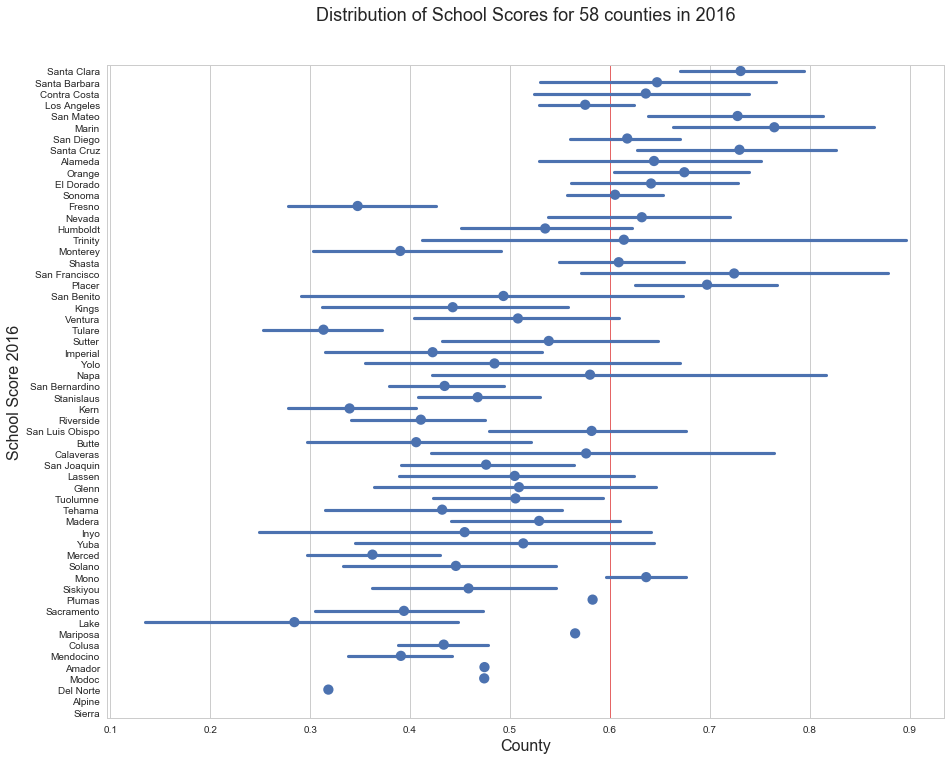

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,12))
ax = sns.pointplot(x='Score2016', y='County',join=False, data = school_rank)
ax.vlines(0.6, -1, 60, color='red', linestyle='-', lw=0.5)

title = ('Distribution of School Scores for 58 counties in 2016')
ax.set_title(title, fontsize=18, y=1.06)
ax.set_ylabel('School Score 2016', fontsize=16) # rota
ax.set_xlabel('County', fontsize=16)


plt.show()

In [77]:
school_cnt = school_rank.groupby('County').agg({'District':{'Count': len}})
school_cnt.columns = school_cnt.columns.droplevel(0)
all_data_sub_cnt = pd.merge(all_data_sub, school_cnt, left_on='RegionName', right_index = True)
all_data_sub_cnt

,RegionName,sold_15,sold_16,list_15,list_16,Score2016,Score2015,coordinates,color,Count
0,Los Angeles,4.987375e+05,5.185083e+05,5.376667e+05,5.873287e+05,0.575243,0.569822,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#ea5e5b,103
1,Orange,6.010208e+05,6.231500e+05,6.759321e+05,7.058900e+05,0.674438,0.682548,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#d9434f,34
2,San Diego,4.721875e+05,4.892500e+05,5.386500e+05,5.755250e+05,0.617286,0.625467,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#e45356,47
3,Riverside,3.090688e+05,3.204375e+05,3.442575e+05,3.617325e+05,0.410757,0.411668,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fd8b69,27
4,San Bernardino,2.643271e+05,2.726667e+05,2.713125e+05,2.917333e+05,0.434529,0.442580,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fb8567,35
5,Santa Clara,7.992500e+05,8.563750e+05,8.225505e+05,8.882302e+05,0.730776,0.727432,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#cd3346,34
6,Alameda,6.147958e+05,6.618083e+05,6.279979e+05,6.877866e+05,0.644101,0.645995,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#df4a53,27
7,Sacramento,2.751083e+05,2.914417e+05,3.066311e+05,3.241530e+05,0.393842,0.432315,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fe916b,16
8,Contra Costa,4.738750e+05,5.033750e+05,5.213989e+05,5.617979e+05,0.635856,0.651134,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#e14d54,21
9,Fresno,2.213333e+05,2.234167e+05,2.538533e+05,2.573312e+05,0.347481,0.335311,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#ffa172,35


In [83]:
trace0 = go.Scatter(
    x=all_data_sub_cnt['Score2016'],
    y=all_data_sub_cnt['sold_16'],
    text=all_data_sub_cnt['RegionName'],
    mode='markers',
    marker=dict(
        color=all_data_sub_cnt['color'],
        size=all_data_sub_cnt['Count'],
    )
)

layout = go.Layout(
    title='Average Sold Housing Price V. School Scores in 2016',
    xaxis=dict(
        title='Average Sold Housing Price in 2016',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='School Scores in 2016',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

data = [trace0]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Average Sold Housing Price in 2016 v. School Scores in 2016')

In [84]:
trace0 = go.Scatter(
    x=all_data_sub_cnt['Score2015'],
    y=all_data_sub_cnt['sold_15'],
    text=all_data_sub_cnt['RegionName'],
    mode='markers',
    marker=dict(
        color=all_data_sub_cnt['color'],
        size=all_data_sub_cnt['Count'],
    )
)

layout = go.Layout(
    title='Average Sold Housing Price v. School Scores in 2015',
    xaxis=dict(
        title='Average Sold Housing Price in 2015',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='School Scores in 2015',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

data = [trace0]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Average Sold Housing Price in 2015 v. School Scores in 2015')

In [ ]:
"""
county_names = []
county_names_dict = {}

for county in california_data['features']:
    for m in range(len(county['properties']['name'])):
        if county['properties']['name'][m:m+6] == 'County':
            county_names.append(county['properties']['name'][0:m-1])
            county_names_dict[county['properties']['name'][0:m-1]] = county['properties']['name']
            
print county_names_dict
"""